In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
# File path to the IMDb dataset
file_path = r"C:\Users\Admin\Downloads\IMDb Movies India.csv"

# Read the dataset into a DataFrame using a different encoding
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [3]:
# Custom label encoder that can handle unseen labels
class CustomLabelEncoder:
    def __init__(self):
        self.encoder = LabelEncoder()
        self.classes_ = None

    def fit(self, data):
        self.encoder.fit(data)
        self.classes_ = list(self.encoder.classes_)

    def transform(self, data):
        new_data = []
        for item in data:
            if item not in self.classes_:
                self.classes_.append(item)
            new_data.append(self.classes_.index(item))
        return np.array(new_data)

# Preprocess the data
le_genre = CustomLabelEncoder()
le_director = CustomLabelEncoder()
le_actors = CustomLabelEncoder()

le_genre.fit(data['Genre'])
le_director.fit(data['Director'])
le_actors.fit(data['Actor 1'])
le_actors.fit(data['Actor 2'])
le_actors.fit(data['Actor 2'])

In [4]:
# Preprocess the data
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data['Director'] = le.fit_transform(data['Director'])
data['Actor 1'] = le.fit_transform(data['Actor 1'])
data['Actor 2'] = le.fit_transform(data['Actor 2'])
data['Actor 3'] = le.fit_transform(data['Actor 3'])

In [5]:
# Remove rows with NaN values
data = data.dropna(subset=['Rating'])

In [6]:
# Remove extra spaces in column names
data.columns = data.columns.str.strip()

In [39]:
data.head(8)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,299,7.0,8.0,1548,3280,4790,527
3,#Yaaram,2019.0,110.0,228,4.4,35.0,3319,2917,1504,4020
5,...Aur Pyaar Ho Gaya,1997.0,147.0,197,4.7,827.0,3800,895,123,3829
6,...Yahaan,2005.0,142.0,366,7.4,1086.0,4993,1698,2359,4762
8,?: A Question Mark,2012.0,82.0,418,5.6,326.0,305,4654,2482,1851
9,@Andheri,2014.0,116.0,38,4.0,11.0,987,677,1197,826
10,1:1.6 An Ode to Lost Love,2004.0,96.0,299,6.2,17.0,2667,3284,1316,614
11,1:13:7 Ek Tera Saath,2016.0,120.0,409,5.9,59.0,614,2778,414,1415


In [7]:
# Ensure 'Year' and 'Duration' columns are strings before processing
data['Year'] = data['Year'].astype(str)
data['Duration'] = data['Duration'].astype(str)
data['Votes'] = data['Votes'].astype(str)

In [8]:
# Convert 'Year' to numerical format
data['Year'] = data['Year'].str.extract('(\\d+)').astype(float)

# Convert 'Duration' to numerical format
data['Duration'] = data['Duration'].str.replace(' min', '').astype(float)

# Convert 'Votes' to numerical format (remove commas and convert to float)
data['Votes'] = data['Votes'].astype(str).str.replace(',', '').astype(float)

In [41]:
data.head(8)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,299,7.0,8.0,1548,3280,4790,527
3,#Yaaram,2019.0,110.0,228,4.4,35.0,3319,2917,1504,4020
5,...Aur Pyaar Ho Gaya,1997.0,147.0,197,4.7,827.0,3800,895,123,3829
6,...Yahaan,2005.0,142.0,366,7.4,1086.0,4993,1698,2359,4762
8,?: A Question Mark,2012.0,82.0,418,5.6,326.0,305,4654,2482,1851
9,@Andheri,2014.0,116.0,38,4.0,11.0,987,677,1197,826
10,1:1.6 An Ode to Lost Love,2004.0,96.0,299,6.2,17.0,2667,3284,1316,614
11,1:13:7 Ek Tera Saath,2016.0,120.0,409,5.9,59.0,614,2778,414,1415


In [9]:
# Handle missing values (e.g., fill with mean or drop)
data = data.dropna(subset=['Year', 'Duration', 'Rating', 'Votes'])

In [10]:
# Select only numeric columns for the correlation matrix
numeric_data = data[['Year', 'Duration', 'Rating', 'Votes']]

# Generate a correlation matrix
correlation_matrix = numeric_data.corr()

In [43]:
data.head(8)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,299,7.0,8.0,1548,3280,4790,527
3,#Yaaram,2019.0,110.0,228,4.4,35.0,3319,2917,1504,4020
5,...Aur Pyaar Ho Gaya,1997.0,147.0,197,4.7,827.0,3800,895,123,3829
6,...Yahaan,2005.0,142.0,366,7.4,1086.0,4993,1698,2359,4762
8,?: A Question Mark,2012.0,82.0,418,5.6,326.0,305,4654,2482,1851
9,@Andheri,2014.0,116.0,38,4.0,11.0,987,677,1197,826
10,1:1.6 An Ode to Lost Love,2004.0,96.0,299,6.2,17.0,2667,3284,1316,614
11,1:13:7 Ek Tera Saath,2016.0,120.0,409,5.9,59.0,614,2778,414,1415


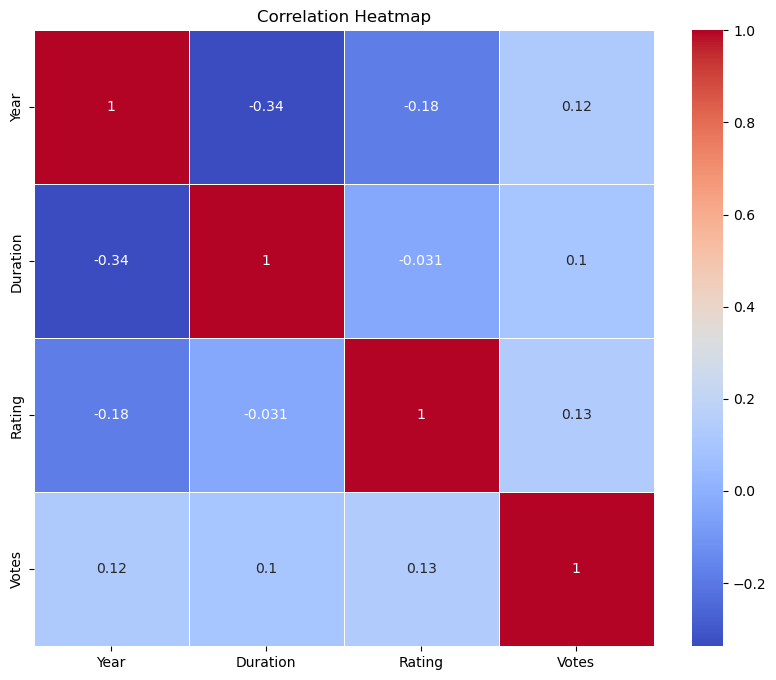

In [11]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Split features and target
X = data[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = data['Rating']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1.7305921023116517
R-squared Score: 0.06983241101804294


In [17]:
# Create mapping function
def create_mapping(series):
    unique_values = series.unique()
    return {value: index for index, value in enumerate(unique_values)}

# Create mappings
genre_mapping = create_mapping(data['Genre'])
director_mapping = create_mapping(data['Director'])
actor1_mapping = create_mapping(data['Actor 1'])
actor2_mapping = create_mapping(data['Actor 2'])
actor3_mapping = create_mapping(data['Actor 3'])

In [18]:
# Make sure you have these mappings defined earlier in your code
genre_mapping = create_mapping(data['Genre'])
director_mapping = create_mapping(data['Director'])
actor1_mapping = create_mapping(data['Actor 1'])
actor2_mapping = create_mapping(data['Actor 2'])
actor3_mapping = create_mapping(data['Actor 3'])

def encode_feature(value, mapping):
    return mapping.get(value, len(mapping))  # If unseen, assign a new number

# Function to predict rating for a new movie
def predict_rating(genre, director, actor1, actor2, actor3):
    genre_encoded = encode_feature(genre, genre_mapping)
    director_encoded = encode_feature(director, director_mapping)
    actor1_encoded = encode_feature(actor1, actor1_mapping)
    actor2_encoded = encode_feature(actor2, actor2_mapping)
    actor3_encoded = encode_feature(actor3, actor3_mapping)
    
    new_movie = np.array([[genre_encoded, director_encoded, actor1_encoded, actor2_encoded, actor3_encoded]])
    predicted_rating = model.predict(new_movie)[0] 
    
    return predicted_rating

# Example usage
new_movie_rating = predict_rating('Drama', 'J.S. Randhawa', 'Manmauji','Birbal','Rajendra Bhatia')
print(f"Predicted Rating: {new_movie_rating}")


Predicted Rating: 6.3450000000000015


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,299,7.0,8.0,1548,3280,4790,527
3,#Yaaram,2019.0,110.0,228,4.4,35.0,3319,2917,1504,4020
5,...Aur Pyaar Ho Gaya,1997.0,147.0,197,4.7,827.0,3800,895,123,3829
6,...Yahaan,2005.0,142.0,366,7.4,1086.0,4993,1698,2359,4762
8,?: A Question Mark,2012.0,82.0,418,5.6,326.0,305,4654,2482,1851
9,@Andheri,2014.0,116.0,38,4.0,11.0,987,677,1197,826
10,1:1.6 An Ode to Lost Love,2004.0,96.0,299,6.2,17.0,2667,3284,1316,614
11,1:13:7 Ek Tera Saath,2016.0,120.0,409,5.9,59.0,614,2778,414,1415
12,100 Days,1991.0,161.0,421,6.5,983.0,3418,1579,2103,1558
13,100% Love,2012.0,166.0,199,5.7,512.0,3751,1679,1913,4199
